In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep = ';',  encoding= 'latin1')
#df.info()
df.head(10)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,AperibÃ©,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,ArmaÃ§Ã£o dos BÃºzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3


In [9]:
#Identificar os municípios da Baixada que compõem os 25% com mais apreensões.
df_reg = df.loc[(df['regiao'] == 'Baixada Fluminense')]
df_men = df_reg.groupby(['fmun'])['aaapai'].sum().reset_index()
df_men = df_men.sort_values(by = 'aaapai' , ascending=False).reset_index()
df_men

,index,fmun,aaapai
0,1,Duque de Caxias,2971
1,8,Nova IguaÃ§u,2514
2,12,SÃ£o JoÃ£o de Meriti,2065
3,0,Belford Roxo,1513
4,5,MagÃ©,809
5,6,Mesquita,758
6,3,ItaguaÃ­,433
7,7,NilÃ³polis,407
8,10,Queimados,364
9,4,Japeri,257


In [5]:
df_menor

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
8,3300456,Belford Roxo,2014,1,2014m01,Baixada Fluminense,29,0,0,29,...,16,0,231,22,3,0,0,0,1367,3
24,3301702,Duque de Caxias,2014,1,2014m01,Baixada Fluminense,37,0,0,37,...,56,0,447,43,3,0,0,0,4247,3
26,3301850,Guapimirim,2014,1,2014m01,Baixada Fluminense,1,0,0,1,...,2,0,35,4,0,0,0,0,137,3
29,3302007,ItaguaÃ­,2014,1,2014m01,Baixada Fluminense,9,0,0,9,...,6,0,57,8,0,1,0,0,461,3
34,3302270,Japeri,2014,1,2014m01,Baixada Fluminense,5,0,0,5,...,10,0,50,3,1,0,0,0,298,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561,3303500,Nova IguaÃ§u,2025,5,2025m05,Baixada Fluminense,28,0,0,28,...,40,6,293,35,2,0,0,0,3222,2
12562,3303609,Paracambi,2025,5,2025m05,Baixada Fluminense,0,0,0,0,...,1,0,15,1,0,0,0,0,126,2
12572,3304144,Queimados,2025,5,2025m05,Baixada Fluminense,1,1,1,3,...,9,4,68,3,0,0,0,0,480,2
12586,3305109,SÃ£o JoÃ£o de Meriti,2025,5,2025m05,Baixada Fluminense,6,0,1,7,...,20,0,94,16,1,0,0,0,1284,2


In [10]:
df_array_m = np.array(df_men['aaapai'])

q1 = np.percentile(df_array_m, 25)
q2 = np.percentile(df_array_m, 50)
q3 = np.percentile(df_array_m, 75)


In [11]:
print(f"Q1={q1}\nQ2={q2}\nQ3={q3}")

Q1=257.0
Q2=433.0
Q3=1513.0


In [12]:
df_men_q1 = df_men.loc[(df_men['aaapai'] <= q1 )]

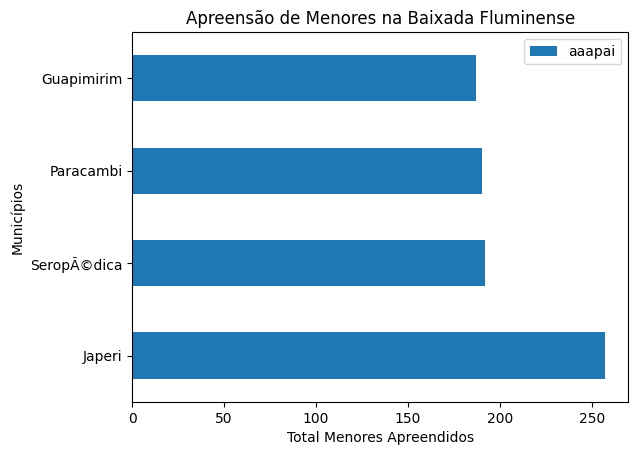

In [13]:
df_men_q1.plot(kind='barh' , x= 'fmun', y= 'aaapai')
plt.xlabel('Total Menores Apreendidos')
plt.ylabel('Municípios')
plt.title('Apreensão de Menores na Baixada Fluminense')
plt.show()